In [6]:
import sys
sys.path.insert(0, '../src')
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from yahtzee import YahtzeeGame

In [7]:
N = 100_000

def simulate_games(n_games=10000, verbose=False):
    scores = []
    start = time.time()
    
    for i in range(n_games):
        game = YahtzeeGame()
        game.run_game()
        scores.append(game.final_score)
        if verbose and i % 1000 == 0:
            print(f"Completed {i} games...")

    end = time.time()
    return scores, end - start

scores, total_time = simulate_games(n_games=N)
sorted_scores = np.sort(scores)
mean_score = np.mean(scores)
std_score = np.std(scores)
min_score = np.min(scores)
max_score = np.max(scores)

print(f"Total Time: {total_time / 60:.2f} minutes to run {N:_} games. - Average score is {mean_score:.1f}.")
print(f"Standard Deviation: {std_score:.2f}")
print(f"Max Score: {max_score}")
print(f"Min Score: {min_score}")

Total Time: 1.13 minutes to run 100_000 games. - Average score is 73.1.
Standard Deviation: 23.42
Max Score: 203
Min Score: 16


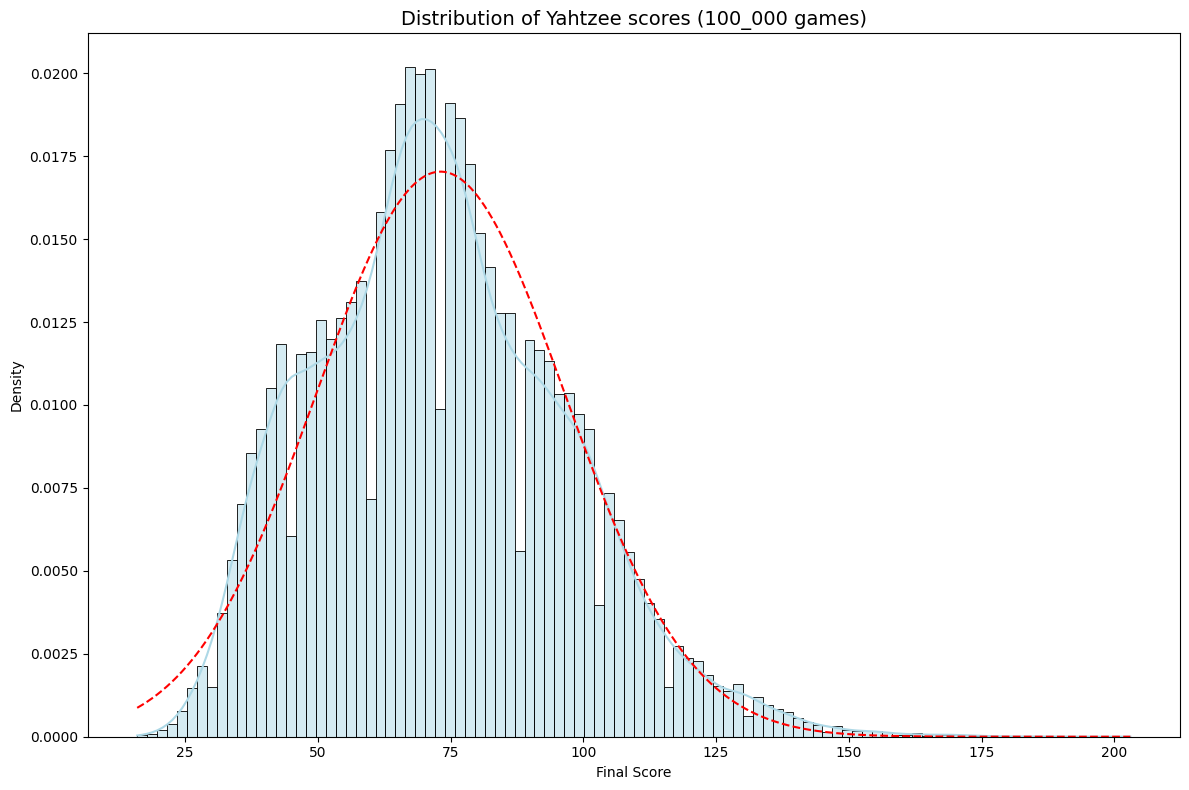

In [ ]:
plt.figure(figsize=(12, 8))

# Plot histogram with KDE (empirical distribution)
sns.histplot(
    sorted_scores,
    bins=100,
    kde=True,
    stat="density",
    color="lightblue",
    edgecolor="black",
)

# Overlay normal distribution curve
x = np.linspace(min(sorted_scores), max(sorted_scores), 1000)
y = norm.pdf(x, mean_score, std_score)
plt.plot(x, y, 'r--', label=f"Normal (μ={mean_score:.1f}, σ={std_score:.1f})")

# Plot styling
plt.title(f"Distribution of Yahtzee scores ({N:_} games)", fontsize=14)
plt.xlabel("Final Score")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()